In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coupe_1 = ['2.B53', '2.B54', '2.B55', '2.B56']
coupe_2 = ['2.B57', '2.B58', '2.B59', '2.B60']

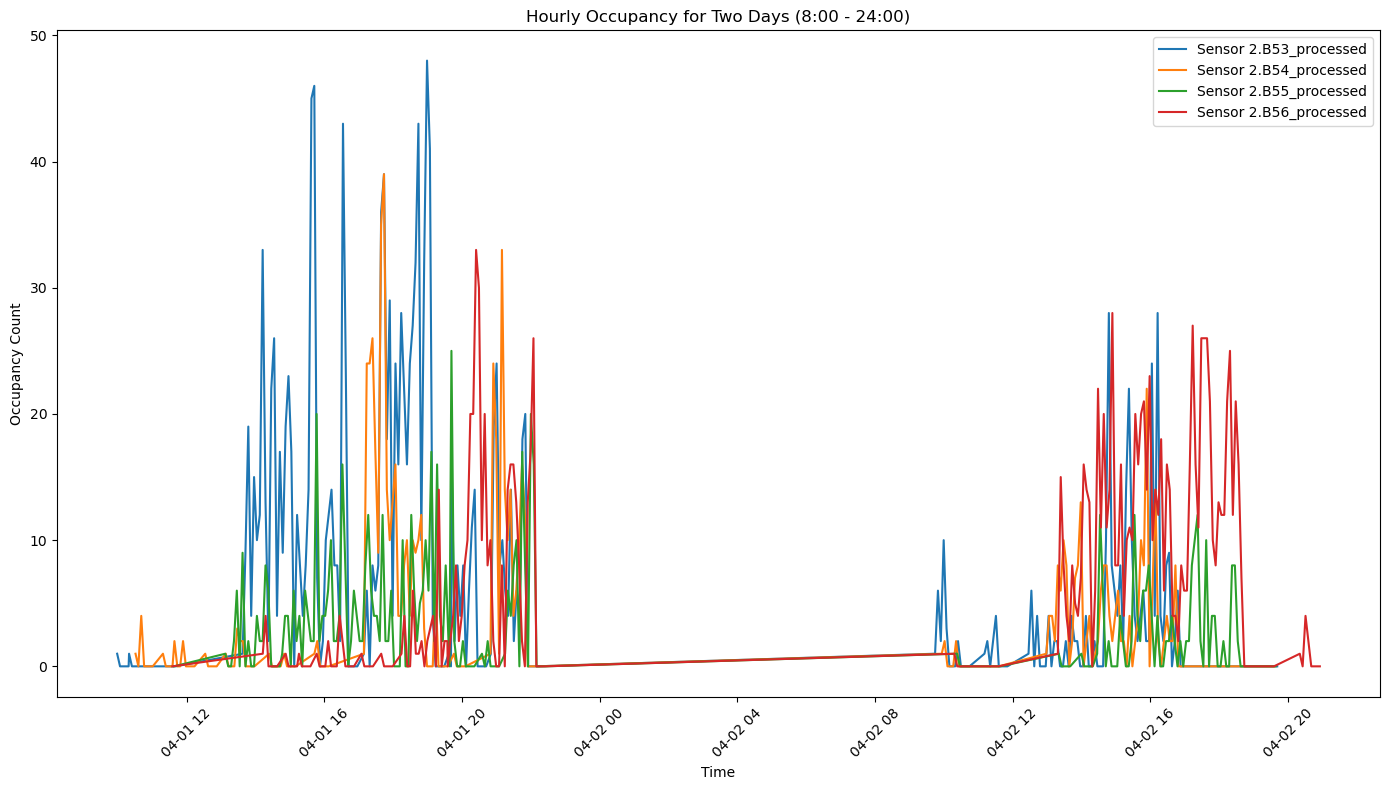

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List of sensor file names
sensors = ['2.B53_processed', '2.B54_processed', '2.B55_processed', '2.B56_processed']
input_folder = 'Data_clean/Locus_sensors/'

# Initialize an empty list to store dataframes for each sensor
dfs = []

# Read and process data for each sensor
for sensor in sensors:
    # Read the data
    df = pd.read_excel(input_folder + f'{sensor}.xlsx')
    
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Filter data to include only hours from 8 to 24
    df = df[df['Date'].dt.hour.between(8, 24)]
    
    # Select one day to zoom in
    day_to_zoom = df['Date'].dt.date.unique()[0]  # Select the first day for simplicity
    
    # Filter data for the selected day and the next day
    selected_days_data = df[df['Date'].dt.date.isin([day_to_zoom, day_to_zoom + pd.Timedelta(days=1)])]
    
    # Group by day and hour to calculate the occupancy
    hourly_occupancy = selected_days_data.groupby(['Date'])['Count'].sum().reset_index()
    
    # Add the hourly occupancy data for the sensor to the list
    dfs.append(hourly_occupancy)

# Concatenate data for all sensors into a single dataframe
combined_data = pd.concat(dfs, ignore_index=True)

# Plot the data
plt.figure(figsize=(14, 8))
for i, df in enumerate(dfs):
    plt.plot(df['Date'], df['Count'], label=f'Sensor {sensors[i]}')

plt.xlabel('Time')
plt.ylabel('Occupancy Count')
plt.title('Hourly Occupancy for Two Days (8:00 - 24:00)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

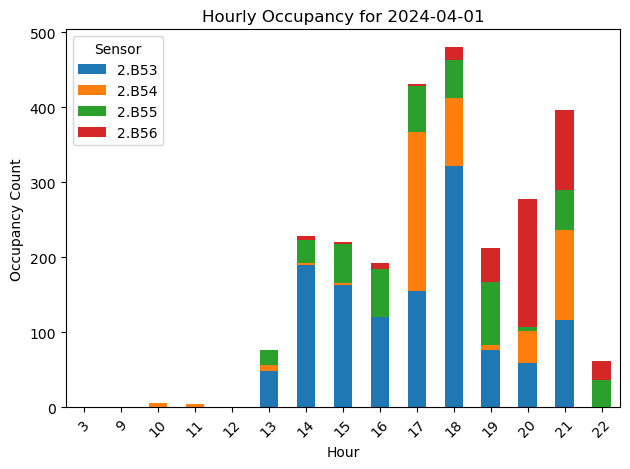

<Figure size 1400x800 with 0 Axes>

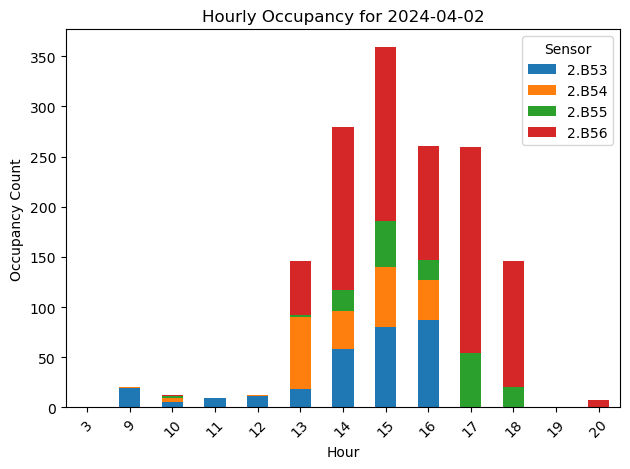

<Figure size 1400x800 with 0 Axes>

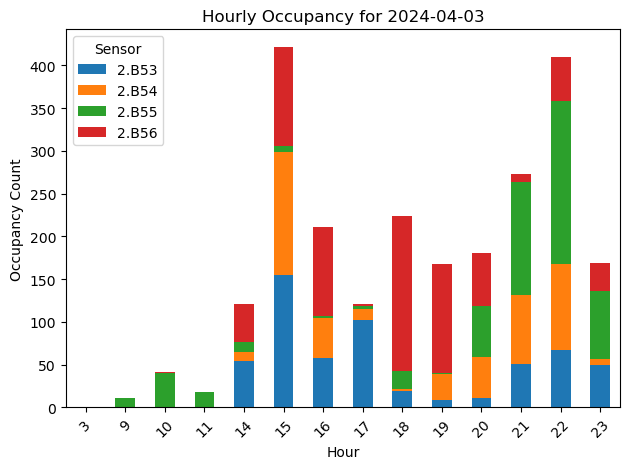

<Figure size 1400x800 with 0 Axes>

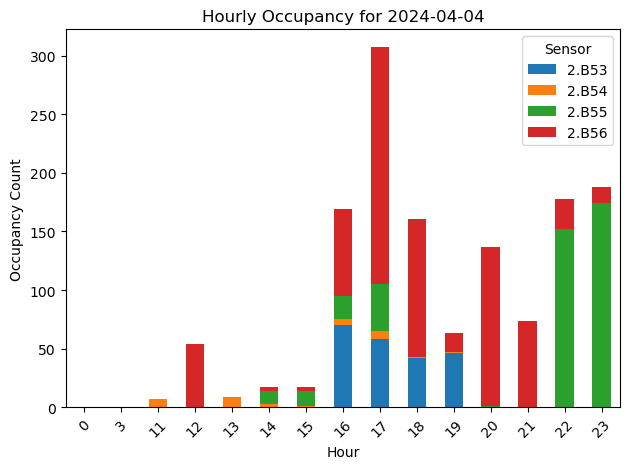

<Figure size 1400x800 with 0 Axes>

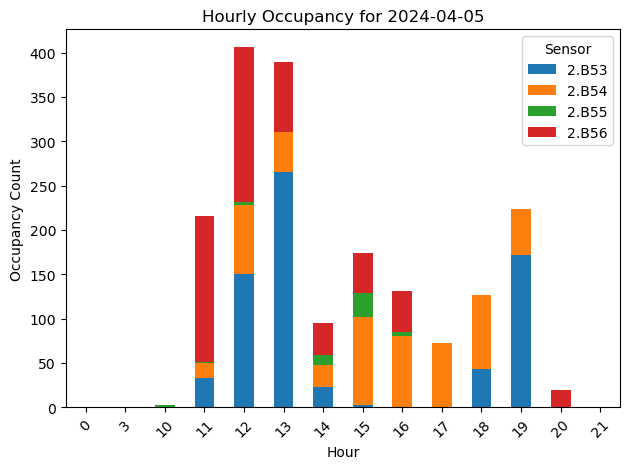

<Figure size 1400x800 with 0 Axes>

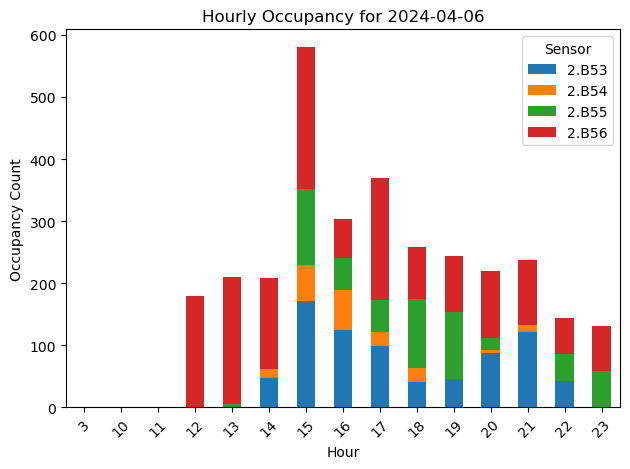

<Figure size 1400x800 with 0 Axes>

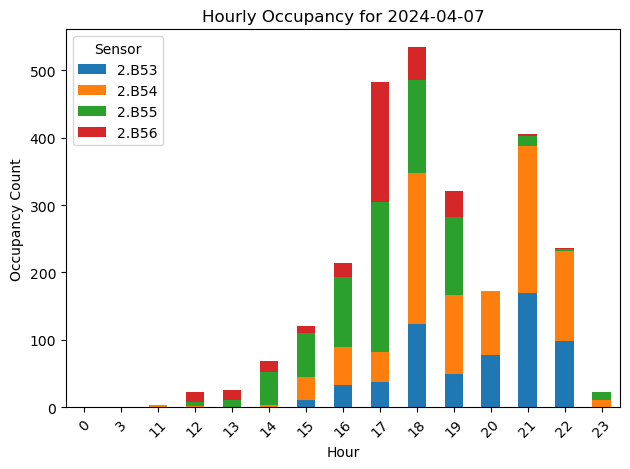

<Figure size 1400x800 with 0 Axes>

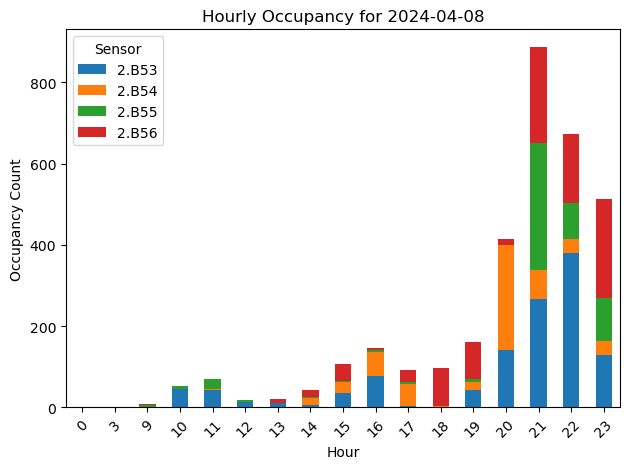

<Figure size 1400x800 with 0 Axes>

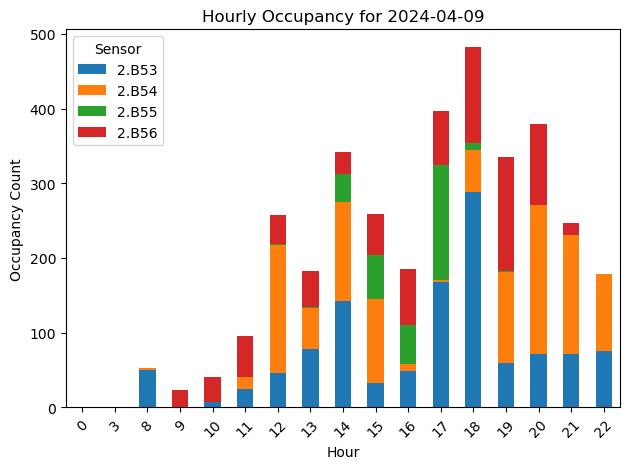

<Figure size 1400x800 with 0 Axes>

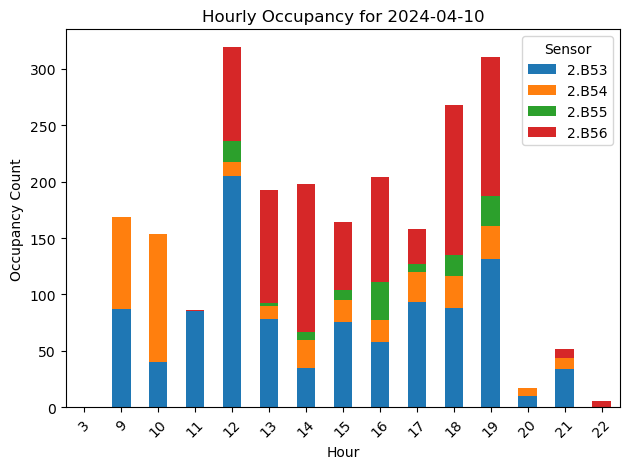

<Figure size 1400x800 with 0 Axes>

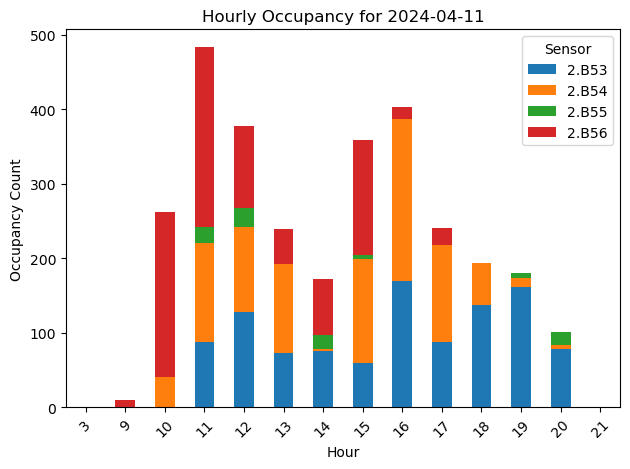

<Figure size 1400x800 with 0 Axes>

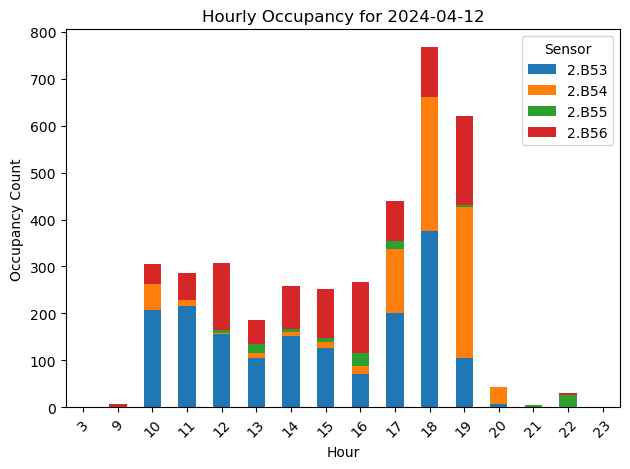

<Figure size 1400x800 with 0 Axes>

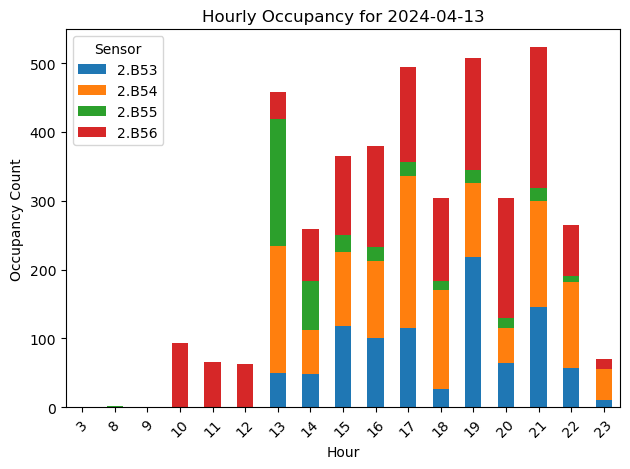

<Figure size 1400x800 with 0 Axes>

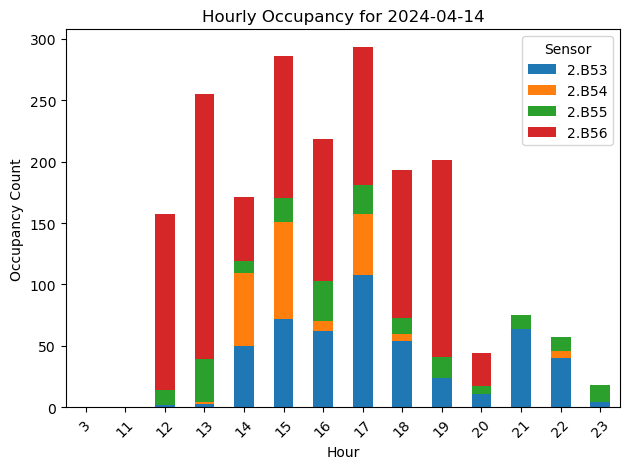

<Figure size 1400x800 with 0 Axes>

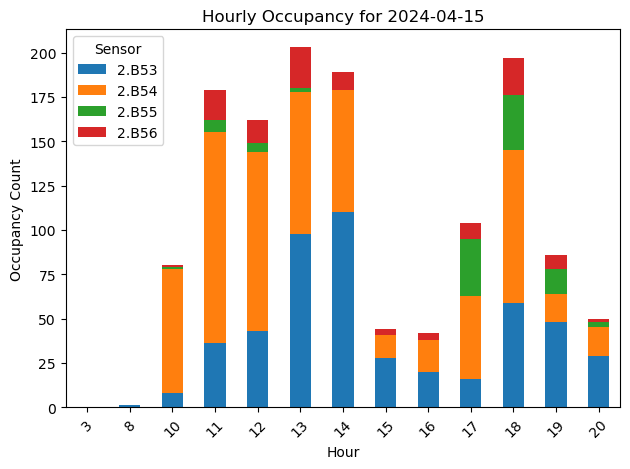

<Figure size 1400x800 with 0 Axes>

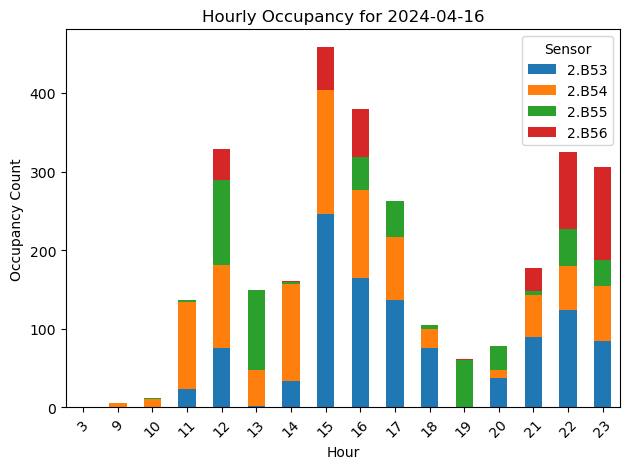

<Figure size 1400x800 with 0 Axes>

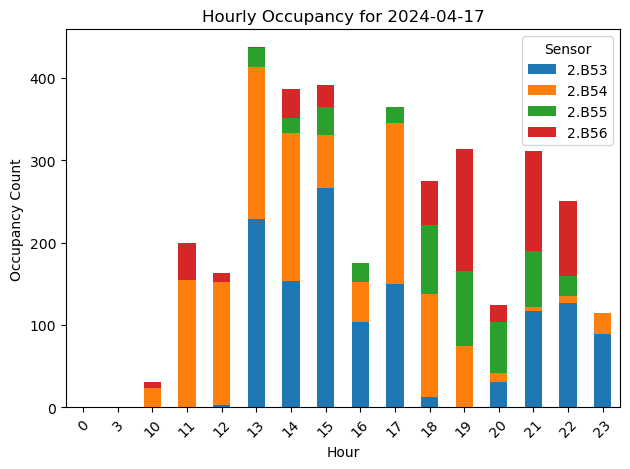

<Figure size 1400x800 with 0 Axes>

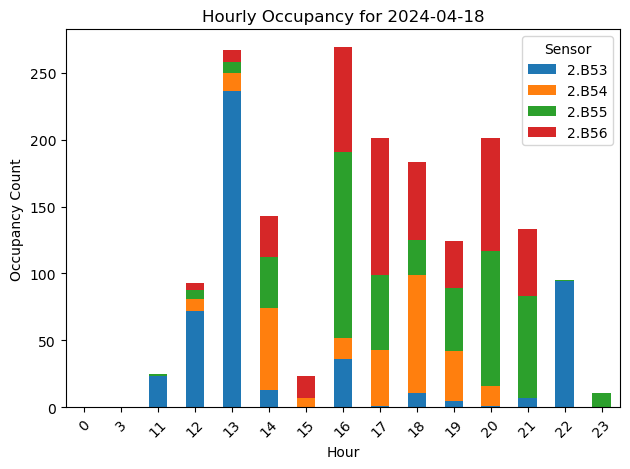

<Figure size 1400x800 with 0 Axes>

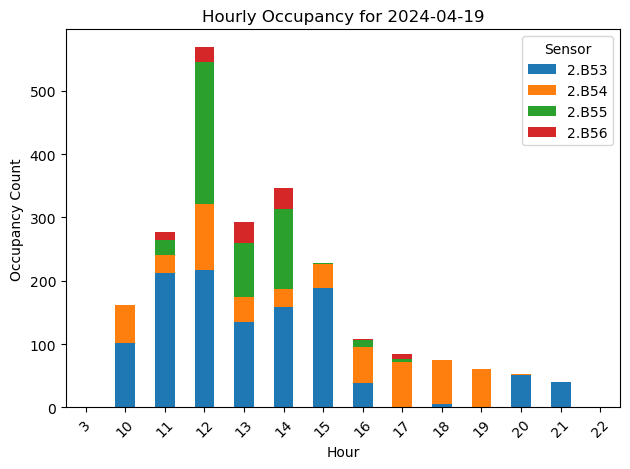

<Figure size 1400x800 with 0 Axes>

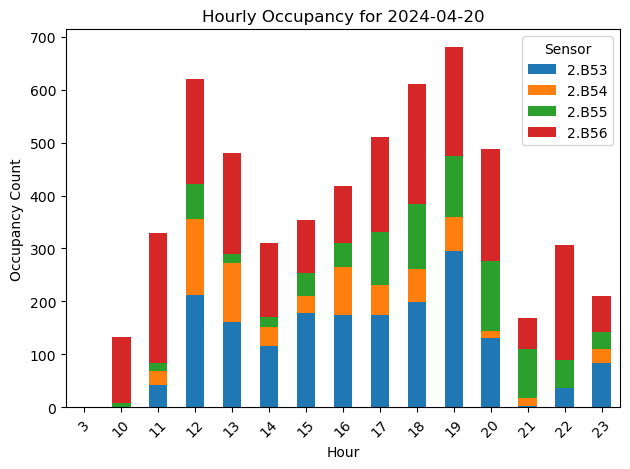

<Figure size 1400x800 with 0 Axes>

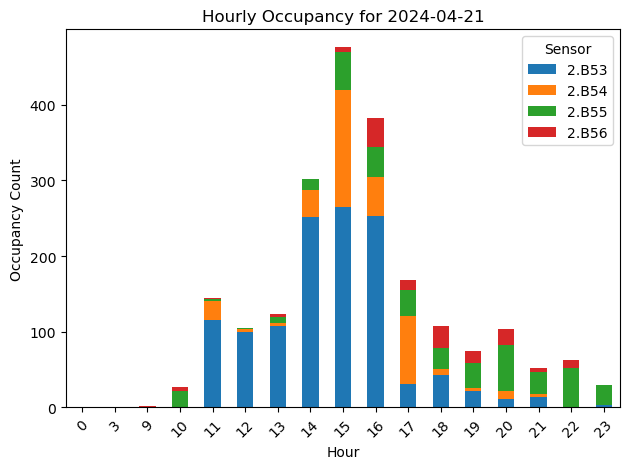

<Figure size 1400x800 with 0 Axes>

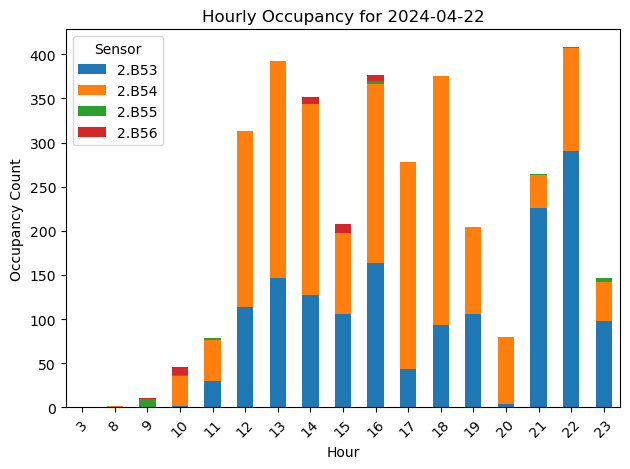

<Figure size 1400x800 with 0 Axes>

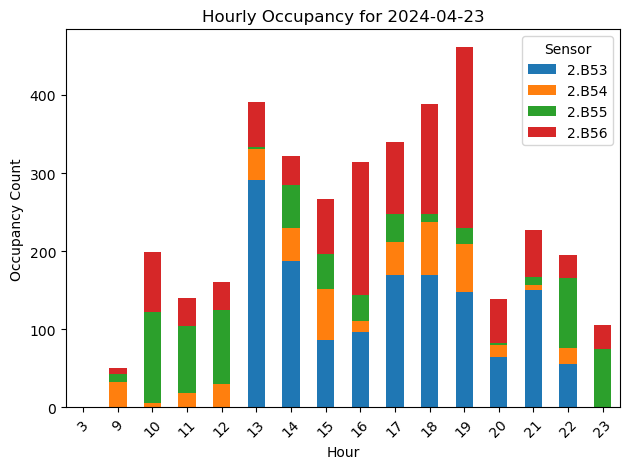

<Figure size 1400x800 with 0 Axes>

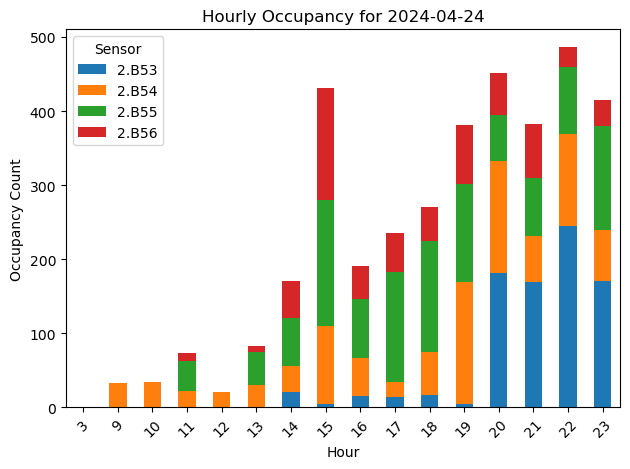

<Figure size 1400x800 with 0 Axes>

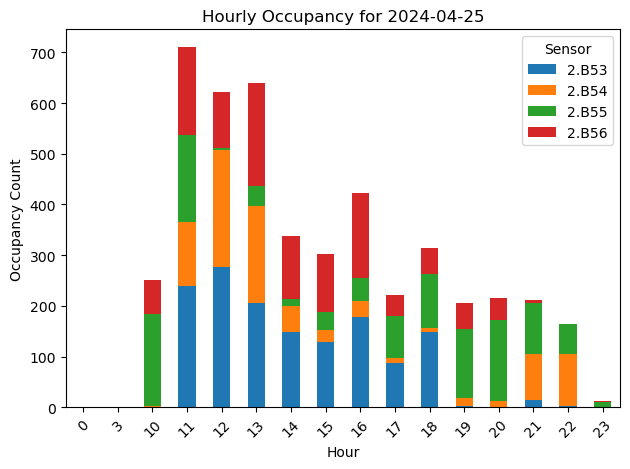

<Figure size 1400x800 with 0 Axes>

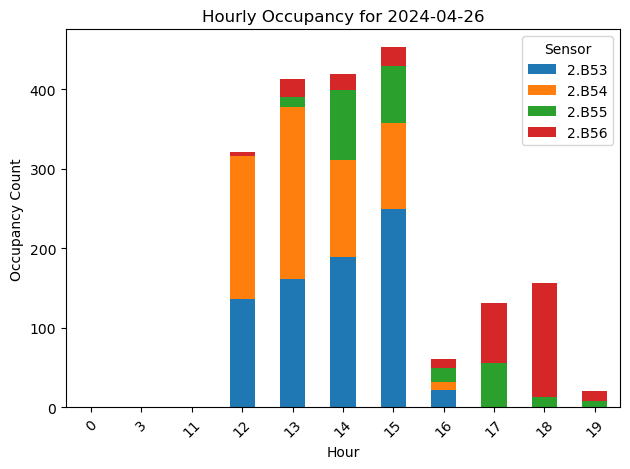

<Figure size 1400x800 with 0 Axes>

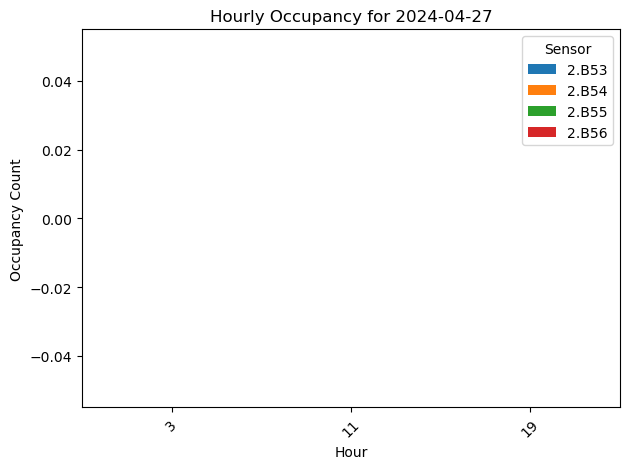

<Figure size 1400x800 with 0 Axes>

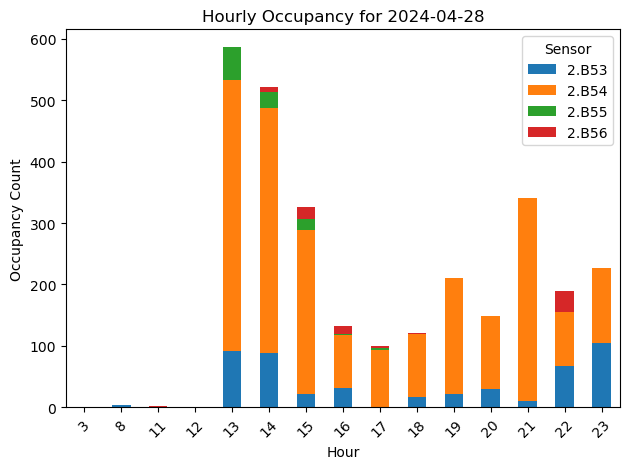

<Figure size 1400x800 with 0 Axes>

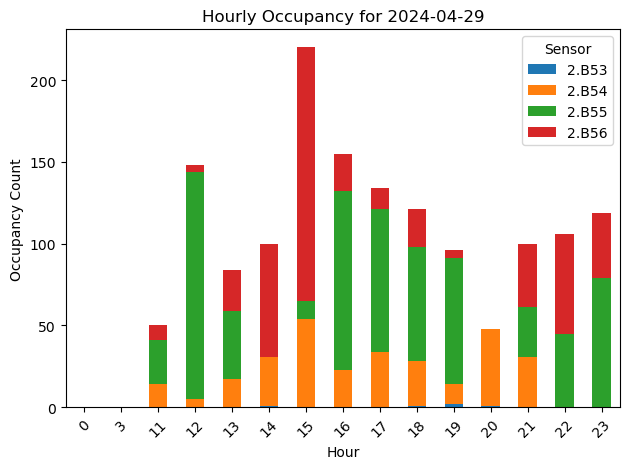

<Figure size 1400x800 with 0 Axes>

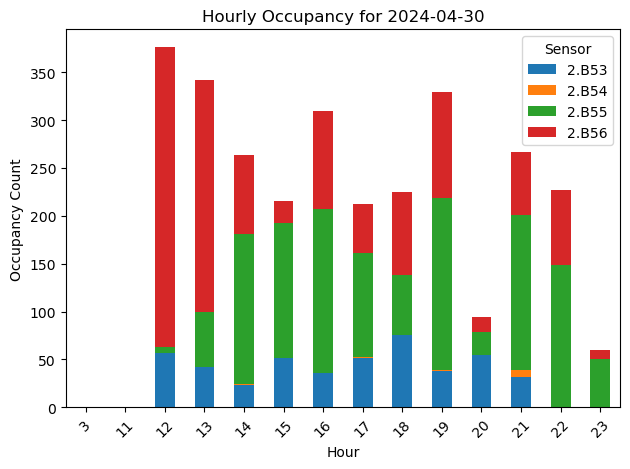

<Figure size 1400x800 with 0 Axes>

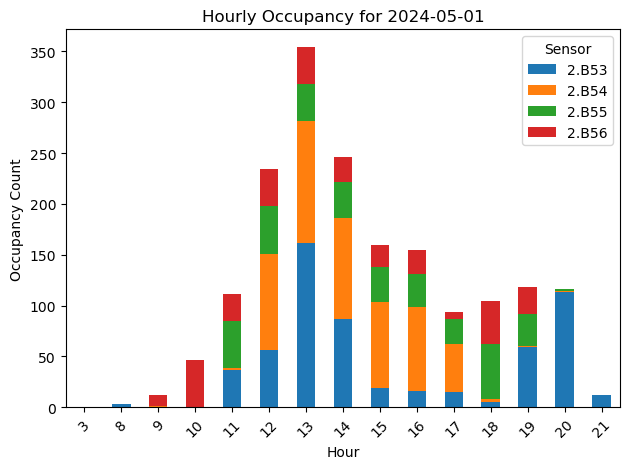

<Figure size 1400x800 with 0 Axes>

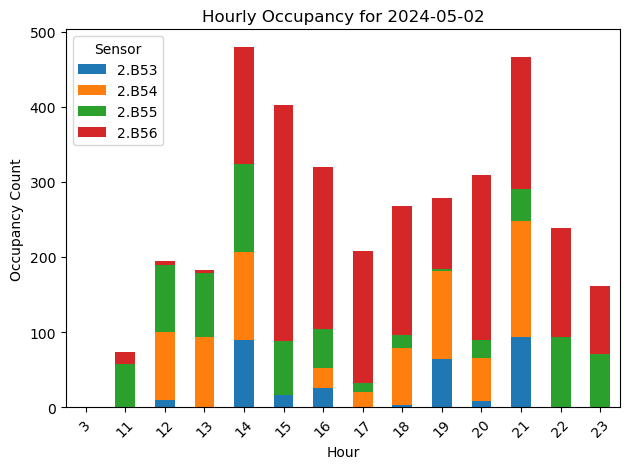

<Figure size 1400x800 with 0 Axes>

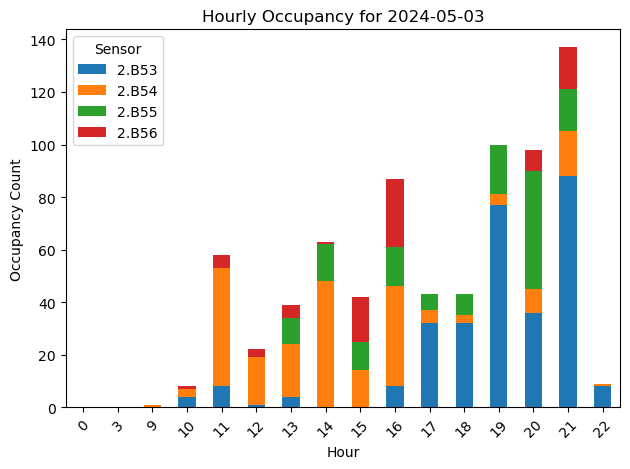

<Figure size 1400x800 with 0 Axes>

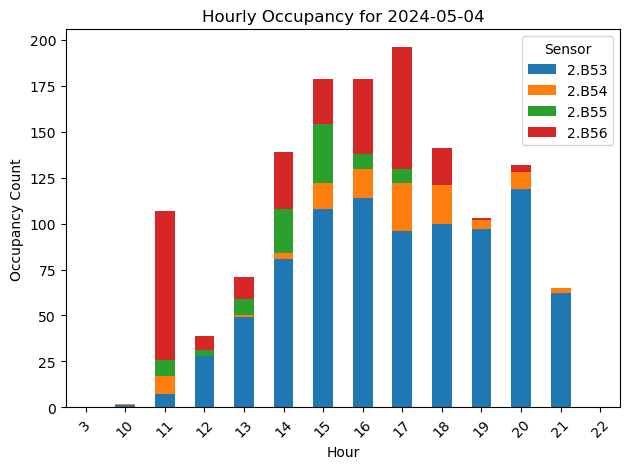

<Figure size 1400x800 with 0 Axes>

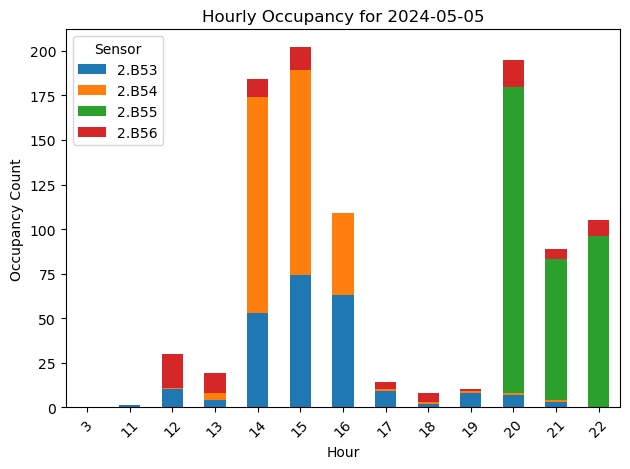

<Figure size 1400x800 with 0 Axes>

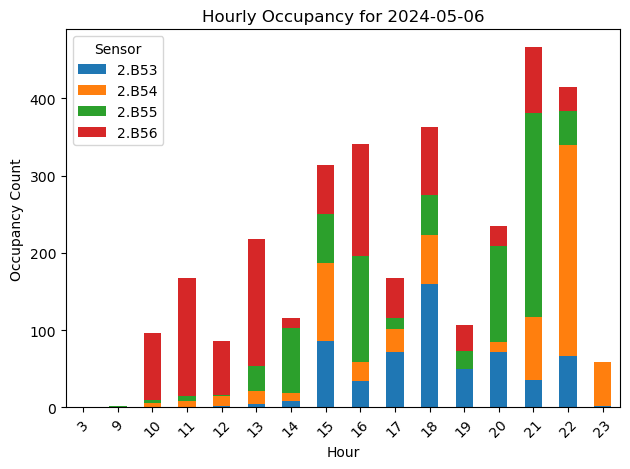

<Figure size 1400x800 with 0 Axes>

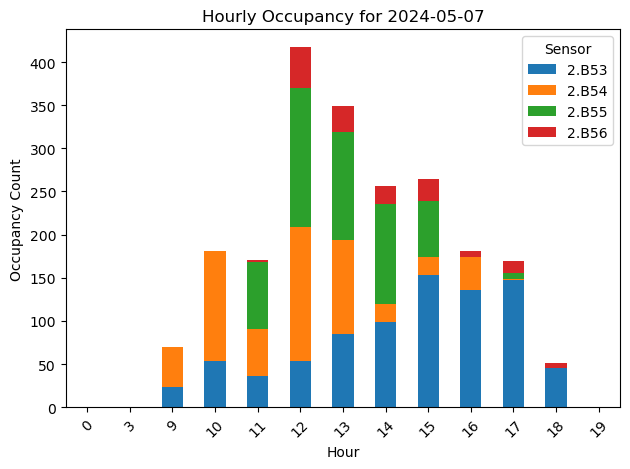

<Figure size 1400x800 with 0 Axes>

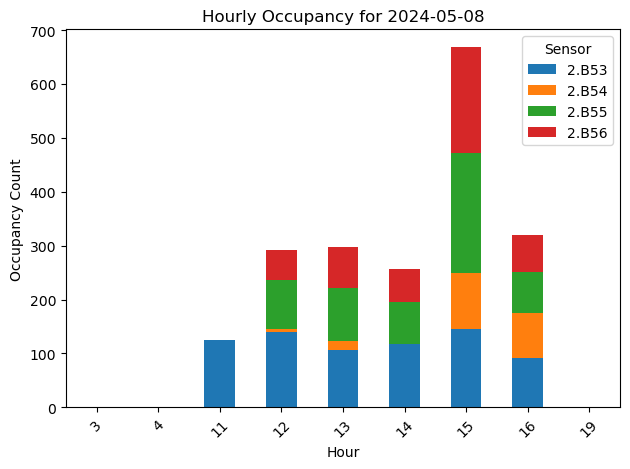

<Figure size 1400x800 with 0 Axes>

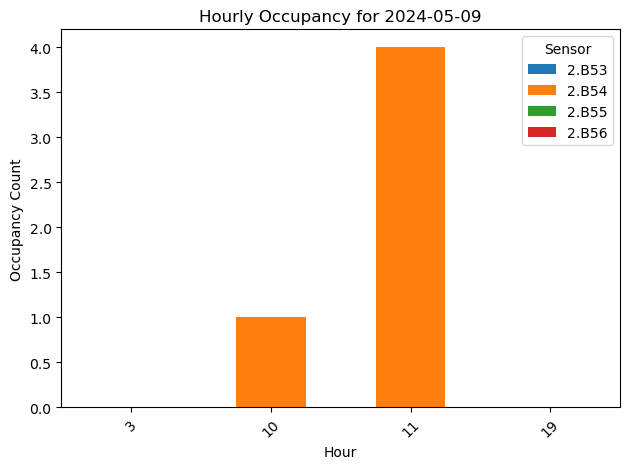

<Figure size 1400x800 with 0 Axes>

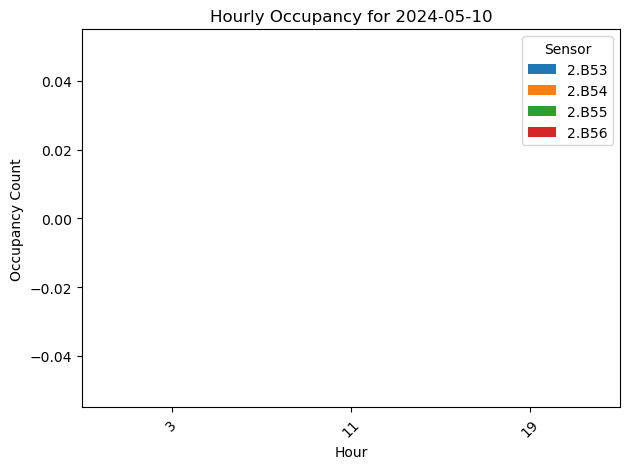

<Figure size 1400x800 with 0 Axes>

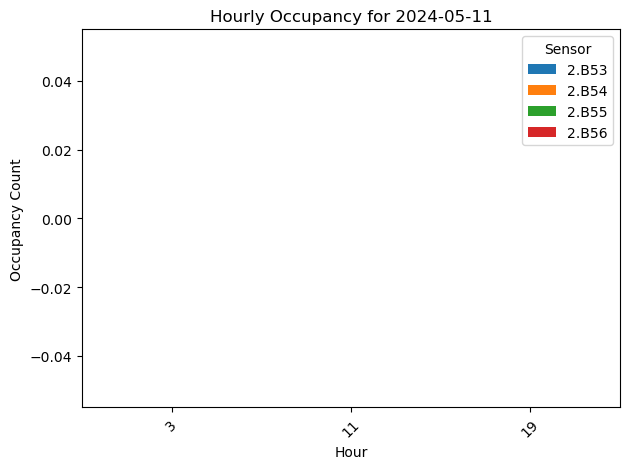

<Figure size 1400x800 with 0 Axes>

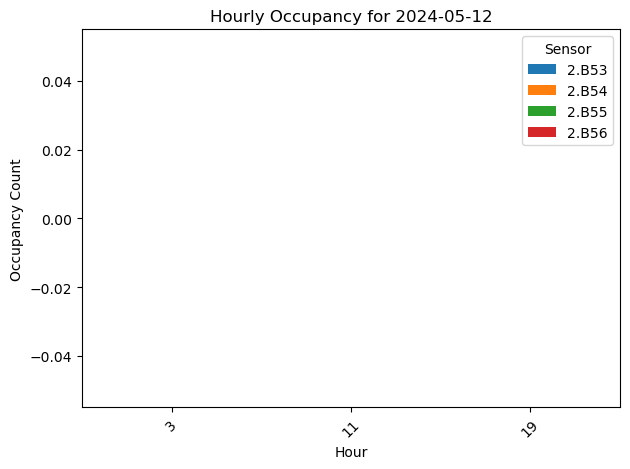

<Figure size 1400x800 with 0 Axes>

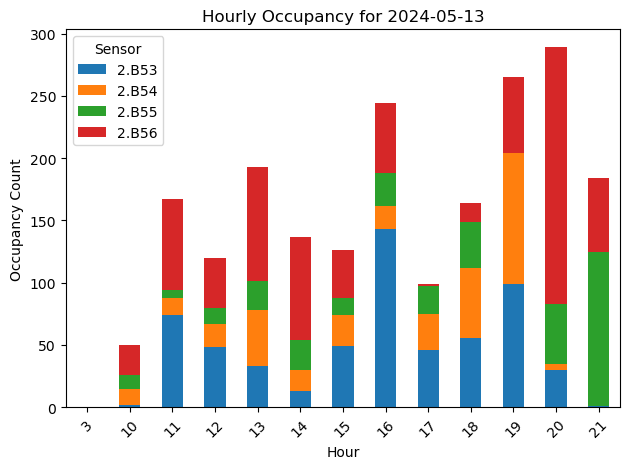

<Figure size 1400x800 with 0 Axes>

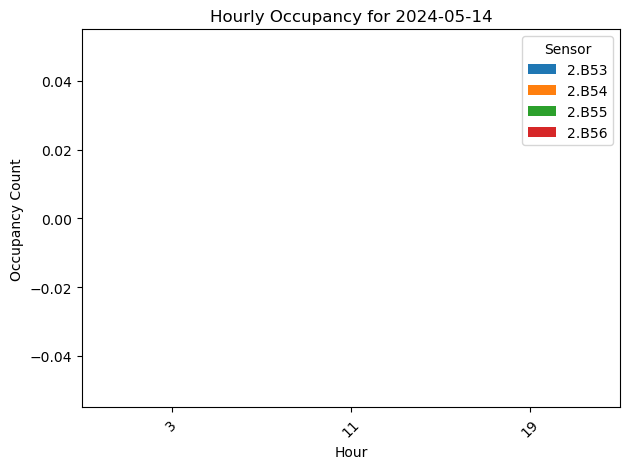

<Figure size 1400x800 with 0 Axes>

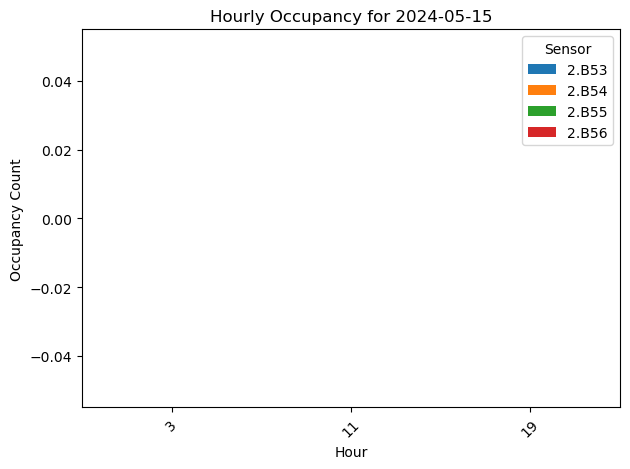

<Figure size 1400x800 with 0 Axes>

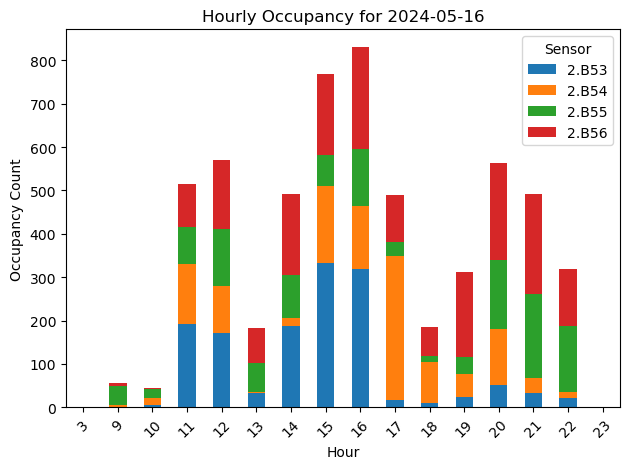

<Figure size 1400x800 with 0 Axes>

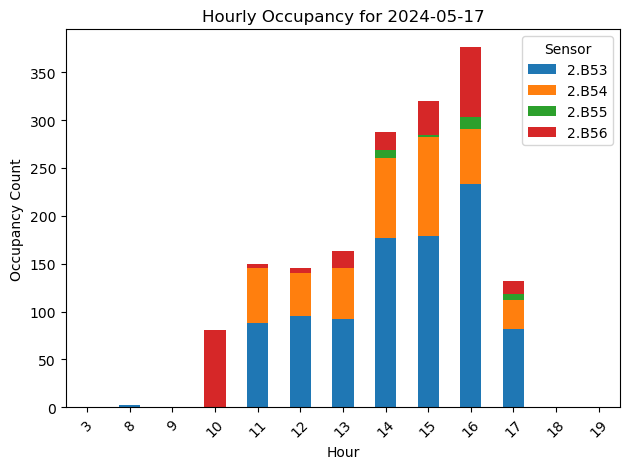

<Figure size 1400x800 with 0 Axes>

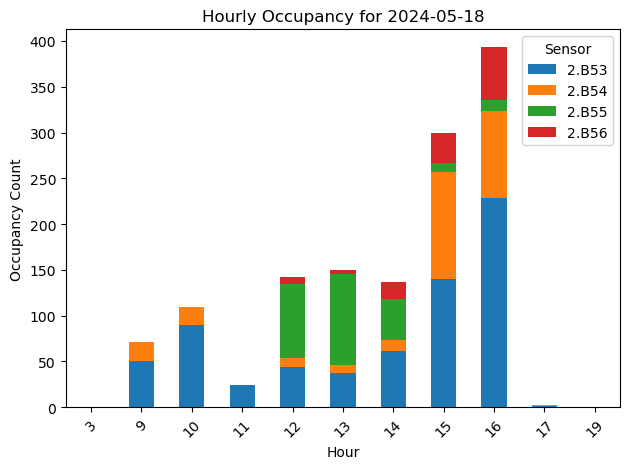

<Figure size 1400x800 with 0 Axes>

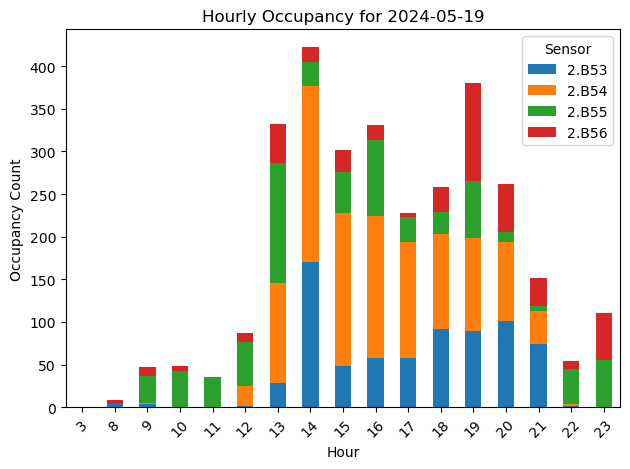

<Figure size 1400x800 with 0 Axes>

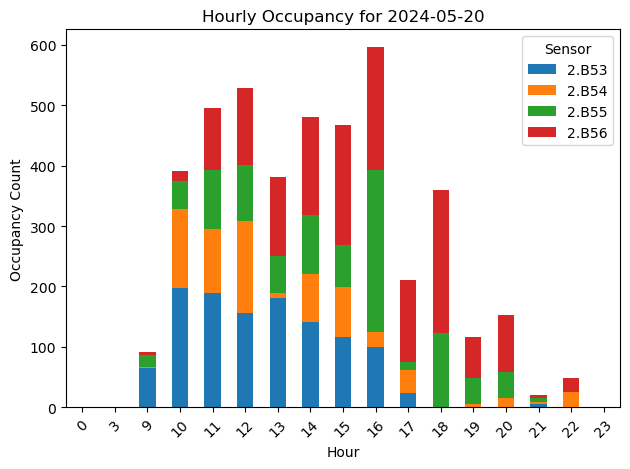

<Figure size 1400x800 with 0 Axes>

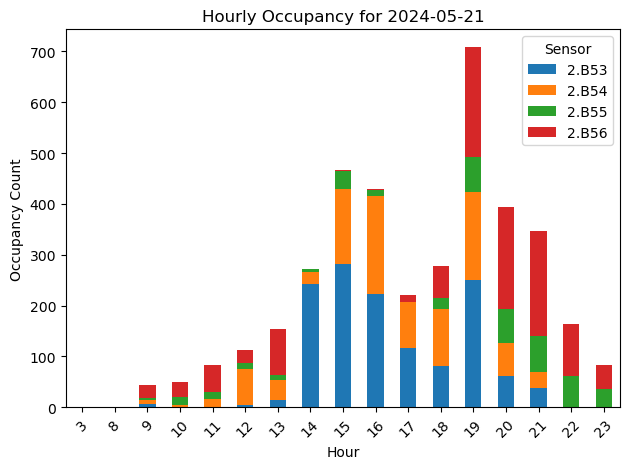

<Figure size 1400x800 with 0 Axes>

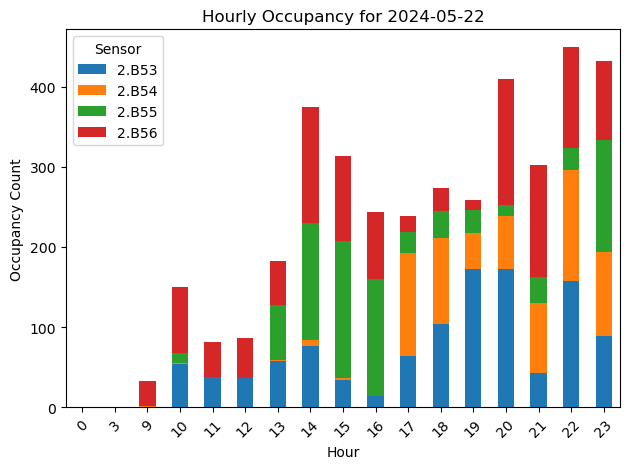

<Figure size 1400x800 with 0 Axes>

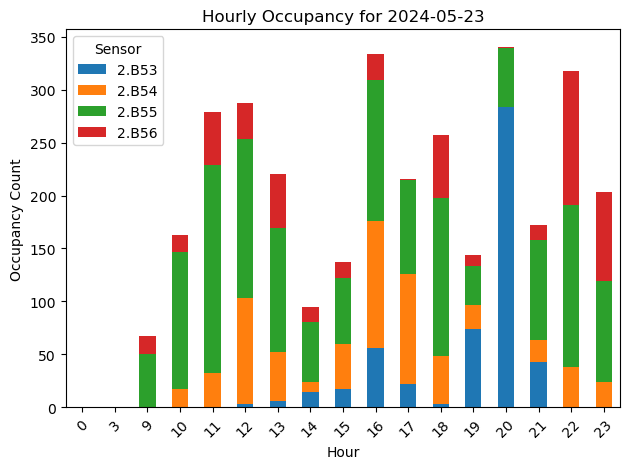

<Figure size 1400x800 with 0 Axes>

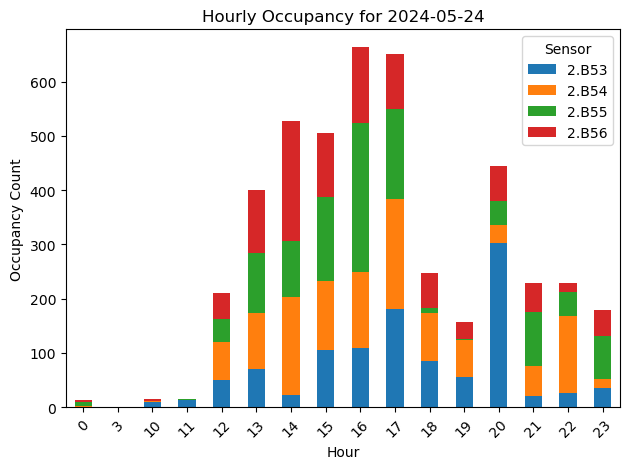

<Figure size 1400x800 with 0 Axes>

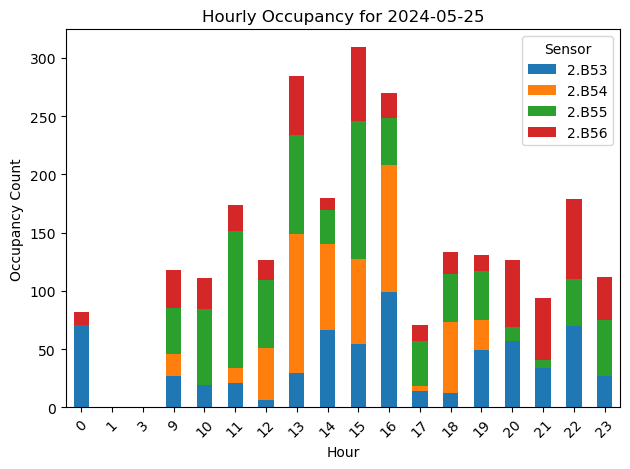

<Figure size 1400x800 with 0 Axes>

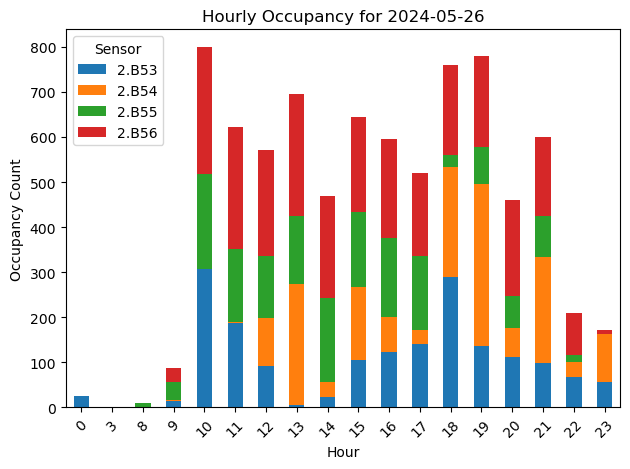

<Figure size 1400x800 with 0 Axes>

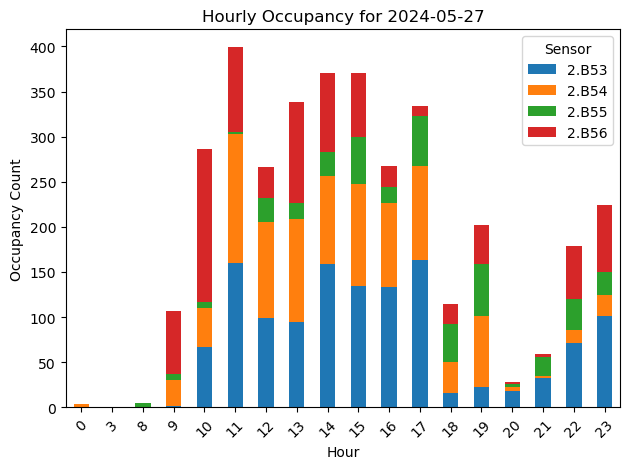

<Figure size 1400x800 with 0 Axes>

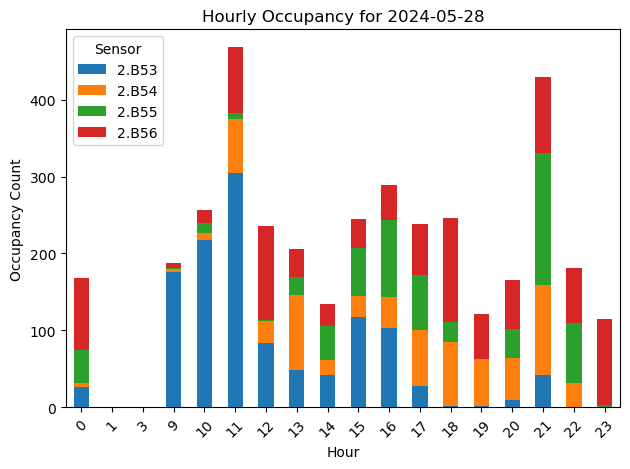

<Figure size 1400x800 with 0 Axes>

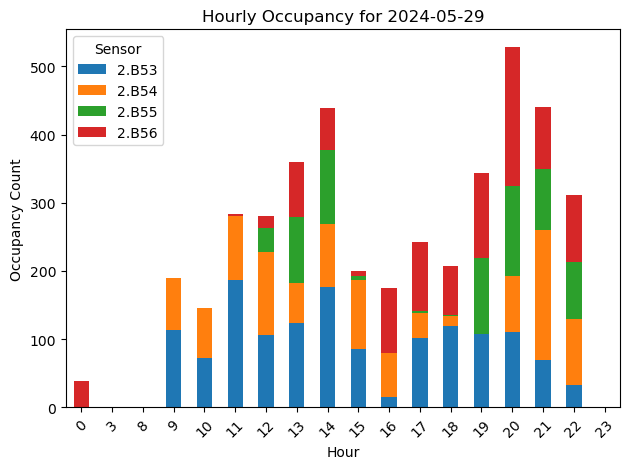

<Figure size 1400x800 with 0 Axes>

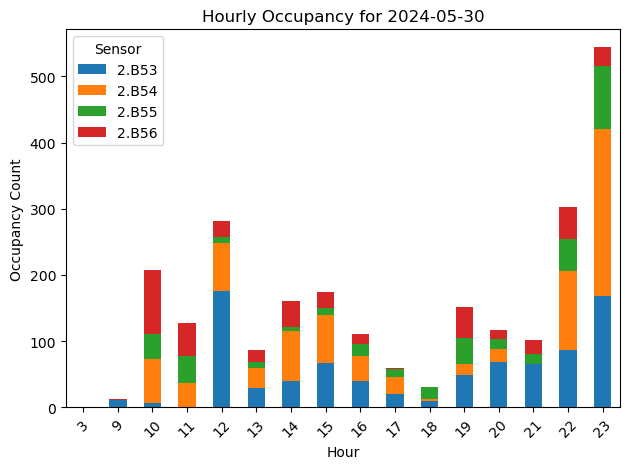

<Figure size 1400x800 with 0 Axes>

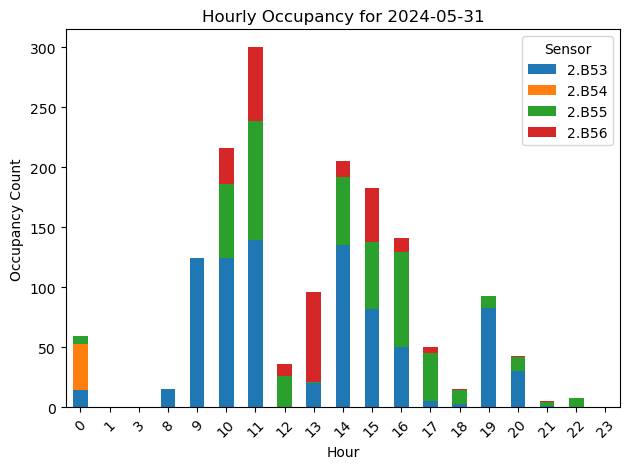

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# List of sensor file names
sensors = ['2.B53', '2.B54', '2.B55', '2.B56']
data_frames = {}

# Read and process data for each sensor
for sensor in sensors:
    # Read the data
    data = pd.read_excel(f'Data/TriggerCounts/Locus_sensors/{sensor}.xlsx', skiprows=2)
    # Filter relevant columns
    data = data[['Date', 'Count']]
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    # Drop rows where 'Date' could not be converted
    data.dropna(subset=['Date'], inplace=True)
    # Add the sensor data to the dictionary
    data_frames[sensor] = data

# Combine data from all sensors into one DataFrame
combined_data = pd.concat(data_frames, keys=sensors, names=['Sensor', 'Index']).reset_index(level='Sensor')
combined_data['Hour'] = combined_data['Date'].dt.hour
combined_data['Day'] = combined_data['Date'].dt.date

# Group by day and hour to calculate the occupancy
hourly_occupancy = combined_data.groupby(['Day', 'Hour', 'Sensor'])['Count'].sum().unstack('Sensor').fillna(0)

# Plot the hourly occupancy for each day
unique_days = hourly_occupancy.index.get_level_values('Day').unique()

for day in unique_days:
    plt.figure(figsize=(14, 8))
    daily_data = hourly_occupancy.loc[day]
    daily_data.plot(kind='bar', stacked=True)
    plt.title(f'Hourly Occupancy for {day}')
    plt.xlabel('Hour')
    plt.ylabel('Occupancy Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sensor')
    plt.tight_layout()
    plt.show()
